In [586]:
#import packages - numpy (stats), matplotlib (graphs), pandas (manipulating csv)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

In [588]:
#load data from csv file
df = pd.read_csv('breast-cancer-dataset.csv', index_col = 0)

In [590]:
df.head(10)

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
S/N,,,,,,,,,,
1,2019.0,40,1,2.0,0.0,Right,0.0,Upper inner,0.0,Benign
2,2019.0,39,1,2.0,0.0,Left,0.0,Upper outer,0.0,Benign
3,2019.0,45,0,4.0,0.0,Left,0.0,Lower outer,0.0,Benign
4,2019.0,26,1,3.0,0.0,Left,0.0,Lower inner,1.0,Benign
5,2019.0,21,1,1.0,0.0,Right,0.0,Upper outer,1.0,Benign
6,2019.0,50,0,5.0,1.0,Right,1.0,Lower outer,0.0,Malignant
7,2019.0,58,0,6.0,1.0,Right,1.0,Upper outer,0.0,Malignant
8,2019.0,21,1,3.0,0.0,Left,0.0,Upper inner,0.0,Benign
9,2019.0,35,1,4.0,0.0,Left,0.0,Upper outer,0.0,Benign


In [592]:
df.shape

(213, 10)

In [594]:
df.info() #check data type and if missing values present

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 1 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              212 non-null    float64
 1   Age               213 non-null    int64  
 2   Menopause         213 non-null    int64  
 3   Tumor Size (cm)   212 non-null    float64
 4   Inv-Nodes         212 non-null    float64
 5   Breast            207 non-null    object 
 6   Metastasis        212 non-null    float64
 7   Breast Quadrant   211 non-null    object 
 8   History           211 non-null    float64
 9   Diagnosis Result  213 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 18.3+ KB


In [596]:
df.describe() #summary of statistics for each numerical column

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Metastasis,History
count,212.000000,213.000000,213.000000,212.000000,212.000000,212.000000,211.000000
mean,2019.523585,39.784038,0.666667,4.268868,0.344340,0.344340,0.412322
std,0.500626,14.096712,0.472515,2.571881,0.476277,0.476277,0.493423
min,2019.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2019.000000,30.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,2020.000000,40.000000,1.000000,4.000000,0.000000,0.000000,0.000000
75%,2020.000000,49.000000,1.000000,6.000000,1.000000,1.000000,1.000000
max,2020.000000,77.000000,1.000000,14.000000,1.000000,1.000000,1.000000


In [598]:
df.isnull().sum() #find number of missing values in each columm

Year                1
Age                 0
Menopause           0
Tumor Size (cm)     1
Inv-Nodes           1
Breast              6
Metastasis          1
Breast Quadrant     2
History             2
Diagnosis Result    0
dtype: int64

In [600]:
#standardize column headers
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ','_')
df.columns = df.columns.str.strip().str.lower().str.replace('(', '').str.replace(')', '')

#drop irrelevant columns
df.drop(columns=['year', 'history','breast'], inplace=True)

In [606]:
#fill the nulls with the mode - less than 1% of the values are missing in data set
for col in ['metastasis','breast_quadrant']:
    df[col].fillna(df[col].mode()[0])

df['tumor_size_cm'] = df['tumor_size_cm'].fillna(df['tumor_size_cm'].median())
df['inv_nodes'] = df['inv_nodes'].fillna(df['inv_nodes'].median())


In [608]:
df.to_csv("breast_cancer_cleaned.csv", index=False)


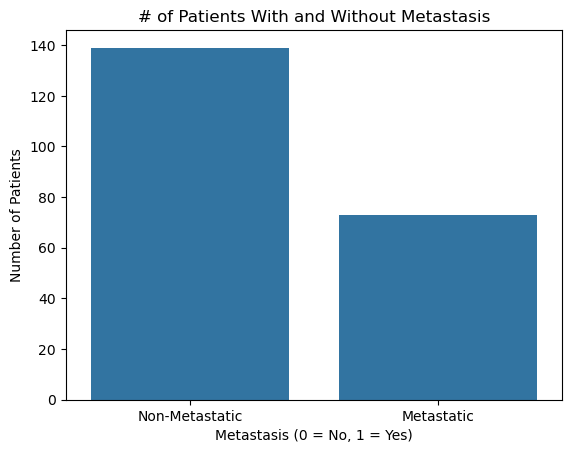

In [618]:
#Distribution of Metastatic vs Non Metastatic Patients
sns.countplot(x='metastasis', data = df)
plt.title('# of Patients With and Without Metastasis')
plt.xlabel('Metastasis (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Non-Metastatic', 'Metastatic'])
plt.show()

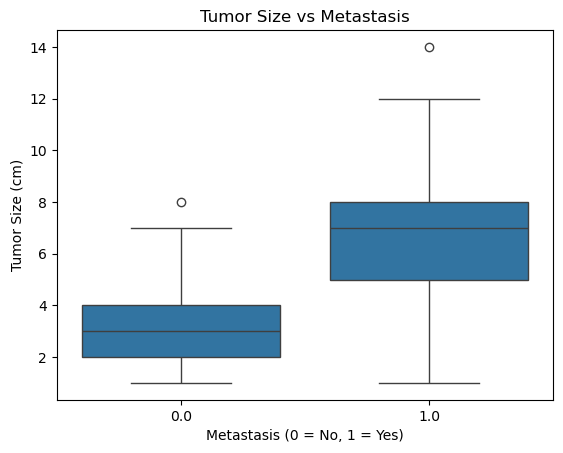

In [610]:
#Boxplot of Tumor Size vs Metastasis
sns.boxplot(x='metastasis', y='tumor_size_cm', data=df)
plt.title('Tumor Size vs Metastasis')
plt.xlabel('Metastasis (0 = No, 1 = Yes)')
plt.ylabel('Tumor Size (cm)')
plt.show()


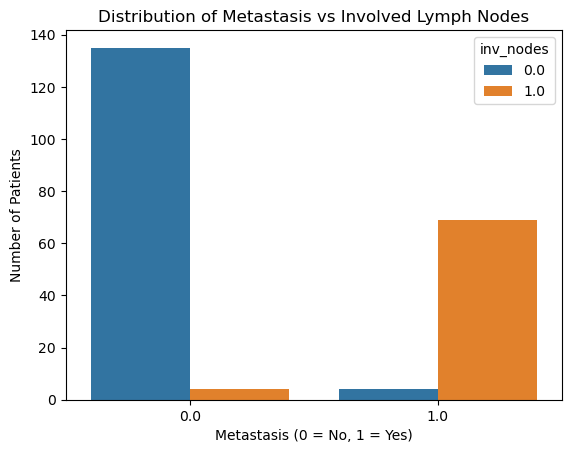

In [560]:
#Box Plot of Lymph Node Involvement vs. Diagnosis Result
sns.countplot(data=df, x='metastasis', hue='inv_nodes')
plt.title('Distribution of Metastasis vs Involved Lymph Nodes')
plt.xlabel('Metastasis (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.show()


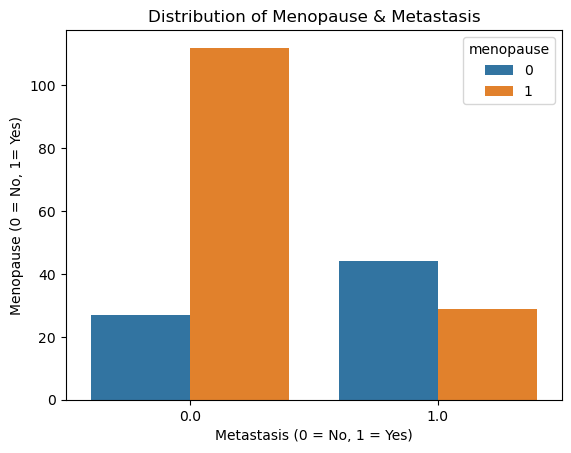

In [562]:
#Distribution of Menopause vs Metastasis
sns.countplot(data=df, x='metastasis', hue='menopause')
plt.title('Distribution of Menopause & Metastasis')
plt.xlabel('Metastasis (0 = No, 1 = Yes)')
plt.ylabel('Menopause (0 = No, 1= Yes)')
plt.show()

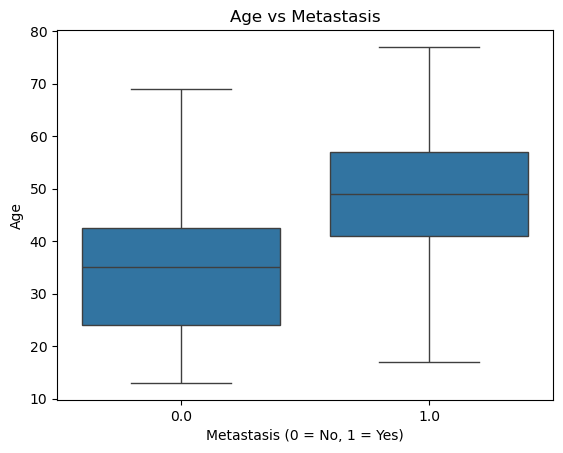

In [564]:
#Age vs. Metastasis
sns.boxplot(x='metastasis', y='age', data=df)
plt.title('Age vs Metastasis')
plt.xlabel('Metastasis (0 = No, 1 = Yes)')
plt.ylabel('Age')

plt.show()

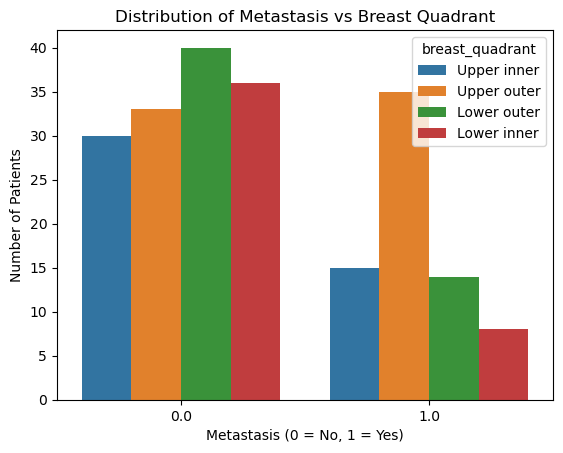

In [568]:
# Breast Quadrant vs. Metastasis 
sns.countplot(data=df, x='metastasis', hue='breast_quadrant')
plt.title('Distribution of Metastasis vs Breast Quadrant')
plt.xlabel('Metastasis (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.show()

In [ ]:
#Hypothesis testing

In [580]:
#Mann-Whitney U Test: Tumor Size vs Metastasis
group_0 = df[df['metastasis'] == 0]['tumor_size_cm']
group_1 = df[df['metastasis'] == 1]['tumor_size_cm']
u_stat, p_value_u = mannwhitneyu(group_0, group_1, alternative='two-sided')
print(f"Mann-Whitney U test: U-statistic = {u_stat:.2f}, p-value = {p_value_u:.2e}")


Mann-Whitney U test: U-statistic = 885.00, p-value = 2.49e-23


In [574]:
#Chi-Square Test: Breast Quadrant vs Metastasis

contingency_table = pd.crosstab(df['breast_quadrant'], df['metastasis'])
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square test: χ² = {chi2_stat:.2f}, p-value = {p_value_chi2:.4f}")

Chi-Square test: χ² = 15.70, p-value = 0.0013
